Google Playstore Case Study 

In this module you will be learning data visualization with the help of a case study. This will enable you to understand how visualization aids you in solving business problems.

Problem Statement 

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than other apps?
- Or does a higher number of initials give a clear picture of which app would have a better rating than others?

In [11]:
#import the libraries
import pandas as pd
import numpy as np

In [13]:
#read the dataset and check the first five rows
inp0 = pd.read_csv("/Users/snadipalli/Documents/Class62/googleplaystorefile.csv")
inp0.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type Price Content Rating  \
0     159  19000.0      10,000+  Free     0       Everyone   
1     967  14000.0     500,000+  Free     0       Everyone   
2   87510   8700.0   5,000,000+  Free     0       Everyone   
3  215644  25000.0  50,000,000+  Free     0           Teen   
4     967   2800.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [15]:
#Check the shape of the dataframe
inp0.shape

(10841, 13)

Data Handling and Cleaning 

The first few steps involve making sure that there are no missing values or incorrect data types before we proceed to the analysis stage. These previously mentioned problems are handled as follows:
- For Missisng Values: Some common technniques to treat this issue are 
- Dropping the rows containing the missing values 
- Inputing the missing values 
- Keep the missing values if they don't affect the analysis

Incorrect Data Types:
- Clean certain values 
- Clean and convert an entire column

In [21]:
#Check the datatypes of all the columns of the dataframe
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [23]:
#Missing Value Treatment (header)

In [25]:
#check the number of null values in the columns
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
Ratings is the target variable
Drop the records

In [29]:
#Drop the rows having null values in the Rating field
inp1 = inp0[~inp0.Rating.isnull()]

#Check the shape of the dataframe
inp1.shape

(9367, 13)

In [31]:
#Check the number of nulls in the Rating field again to cross verify
inp1.Rating.isnull().sum()

0

In [33]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [35]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [37]:
#Inspect the nulls in the Android Version column
inp1[inp1["Android Ver"].isnull()]

App         Category  Rating  \
4453                    [substratum] Vacuum: P  PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]  PERSONALIZATION     4.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

      Reviews          Size Installs  Type     Price Content Rating  \
4453      230  11000.000000   1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000  10,000+  Free         0       Everyone   
10472    3.0M  21516.529524     Free     0  Everyone            NaN   

                  Genres    Last Updated Current Ver Android Ver  
4453     Personalization   July 20, 2018         4.4         NaN  
4490     Personalization  March 27, 2018         1.1         NaN  
10472  February 11, 2018          1.0.19  4.0 and up         NaN

In [39]:
#Drop the row having shifted values
inp1.loc[10472,:]
inp1[(inp1["Android Ver"].isnull() & (inp1.Category == "1.9"))]
inp1 = inp1[~(inp1["Android Ver"].isnull() & (inp1.Category == "1.9"))]
#Check the nulls again in the Android Version to the column to cross verify
inp1[inp1["Android Ver"].isnull()]

App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   
4490    Pi Dark [substratum]  PERSONALIZATION     4.5     189   2100.0   

     Installs  Type  Price Content Rating           Genres    Last Updated  \
4453   1,000+  Paid  $1.49       Everyone  Personalization   July 20, 2018   
4490  10,000+  Free      0       Everyone  Personalization  March 27, 2018   

     Current Ver Android Ver  
4453         4.4         NaN  
4490         1.1         NaN

In [43]:
#Check the most common value in the Android Version column
inp1["Android Ver"].value_counts()

Android Ver
4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [45]:
#Fill up the nulls in the Android Version Column
inp1["Android Ver"].value_counts()

Android Ver
4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [47]:
#Check the nulls in the Android Version column again to cross verify
inp1["Android Ver"].isnull().sum()

2

In [49]:
#Check the nulls in the entire dateframe again
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [51]:
#Check the most common value in the Current Version column
inp1["Current Ver"].value_counts()

Current Ver
Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

Handling Incorrect Data Types 

In [55]:
#Check the datatypes of all the columns
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [57]:
#Question - Try calculating the average price of all apps having the Android verson as "4.1 and up"
inp1.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type Price Content Rating  \
0     159  19000.0      10,000+  Free     0       Everyone   
1     967  14000.0     500,000+  Free     0       Everyone   
2   87510   8700.0   5,000,000+  Free     0       Everyone   
3  215644  25000.0  50,000,000+  Free     0           Teen   
4     967   2800.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [59]:
#Analyze the Price column to check the issue
inp1.Price.value_counts()

Price
0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: count, Length: 73, dtype: int64

In [61]:
#Write the function to make the needed changes 
inp1.Price = inp1.Price.apply(lambda x:0 if x=="0" else float (x[1:]))

In [63]:
#Verify the dtype of Price once again
inp1.Price.dtype

dtype('float64')

In [65]:
#Analyze the Reviews column
inp1.Reviews.value_counts()

Reviews
2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: count, Length: 5992, dtype: int64

In [67]:
#Change the dtype of this column
inp1.Reviews.value_counts()

Reviews
2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: count, Length: 5992, dtype: int64

In [69]:
#Change the dtype of this column
inp1.Reviews = inp1.Reviews.astype ("int32")
#Check the quantitative spread of this dataframe
inp1.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [71]:
#Analyze the Installs Column
inp1.Installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [73]:
#Question: Clean the Installs column and find the approximate number of apps at the 50th percentile
def clean_installs(val):
    return int(val.replace(",","").replace("+",""))
type(clean_installs("3,000+"))
inp1.Installs = inp1.Installs.apply(clean_installs)
inp1.Installs.describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

Sanity Checks 

The data that we have needs to make sense in order to perform sanity checks to ensure they are factually correct as well. Some sanity checks can be:
- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of installs
- Free Apps shouldn't have a price greater than 0.

In [79]:
#Perform the sanity checks on the Reviews column
inp1[(inp1.Reviews > inp1.Installs)].shape

(7, 13)

In [81]:
inp1[(inp1.Reviews > inp1.Installs)]

App   Category  Rating  Reviews  \
2454             KBA-EZ Health Guide    MEDICAL     5.0        4   
4663   Alarmy (Sleep If U Can) - Pro  LIFESTYLE     4.8    10249   
5917                        Ra Ga Ba       GAME     5.0        2   
6700                Brick Breaker BR       GAME     5.0        7   
7402            Trovami se ci riesci       GAME     5.0       11   
8591                         DN Blog     SOCIAL     5.0       20   
10697                        Mu.F.O.       GAME     5.0        2   

               Size  Installs  Type  Price Content Rating     Genres  \
2454   25000.000000         1  Free   0.00       Everyone    Medical   
4663   21516.529524     10000  Paid   2.49       Everyone  Lifestyle   
5917   20000.000000         1  Paid   1.49       Everyone     Arcade   
6700   19000.000000         5  Free   0.00       Everyone     Arcade   
7402    6100.000000        10  Free   0.00       Everyone     Arcade   
8591    4200.000000        10  Free   0.00           Teen     Social   
10697  16000.000000         1  Paid   0.99       Everyone     Arcade   

           Last Updated         Current Ver         Android Ver  
2454     August 2, 2018              1.0.72        4.0.3 and up  
4663      July 30, 2018  Varies with device  Varies with device  
5917   February 8, 2017               1.0.4          2.3 and up  
6700      July 23, 2018                 1.0          4.1 and up  
7402     March 11, 2017                 0.1          2.3 and up  
8591      July 23, 2018                 1.0          4.0 and up  
10697     March 3, 2017                 1.0          2.3 and up

In [83]:
inp1 = inp1[inp1.Reviews <= inp1.Installs]

In [85]:
#perform the sanity checks on prices of free apps
inp1[(inp1.Type == "Free") & (inp1.Price>0)]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

Outliers Analysis Using Boxplot 

Now you need to start identifying and removing extreme values or outliers from our dataset. These values can lift our analysis and often provide uswith a biased perspective of the data available. This is where you'll start utlizing visualization to achieve your tasks. And the best visualization to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable. 
Using a box plot you can idenitfy the outliers as follows:
- Box Plots to identify outliers
- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyze, and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.
- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in theh previous session. Check out their official documentation here

In [96]:
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

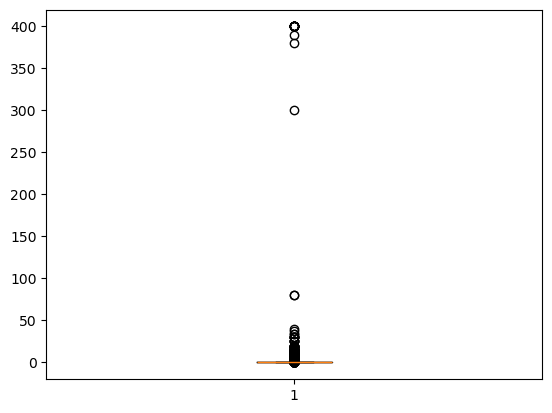

In [98]:
#Create a box plot for the price column
plt.boxplot(inp1.Price)
plt.show()

In [100]:
#Check theh apps with price more than 200
inp1[inp1.Price > 200]

App   Category  Rating  Reviews     Size  \
4197          most expensive app (H)     FAMILY     4.3        6   1500.0   
4362                      💎 I'm rich  LIFESTYLE     3.8      718  26000.0   
4367        I'm Rich - Trump Edition  LIFESTYLE     3.6      275   7300.0   
5351                       I am rich  LIFESTYLE     3.8     3547   1800.0   
5354                  I am Rich Plus     FAMILY     4.0      856   8700.0   
5355                   I am rich VIP  LIFESTYLE     3.8      411   2600.0   
5356               I Am Rich Premium    FINANCE     4.1     1867   4700.0   
5357             I am extremely Rich  LIFESTYLE     2.9       41   2900.0   
5358                      I am Rich!    FINANCE     3.8       93  22000.0   
5359              I am rich(premium)    FINANCE     3.5      472    965.0   
5362                   I Am Rich Pro     FAMILY     4.4      201   2700.0   
5364  I am rich (Most expensive app)    FINANCE     4.1      129   2700.0   
5366                       I Am Rich     FAMILY     3.6      217   4900.0   
5369                       I am Rich    FINANCE     4.3      180   3800.0   
5373              I AM RICH PRO PLUS    FINANCE     4.0       36  41000.0   

      Installs  Type   Price Content Rating         Genres       Last Updated  \
4197       100  Paid  399.99       Everyone  Entertainment      July 16, 2018   
4362     10000  Paid  399.99       Everyone      Lifestyle     March 11, 2018   
4367     10000  Paid  400.00       Everyone      Lifestyle        May 3, 2018   
5351    100000  Paid  399.99       Everyone      Lifestyle   January 12, 2018   
5354     10000  Paid  399.99       Everyone  Entertainment       May 19, 2018   
5355     10000  Paid  299.99       Everyone      Lifestyle      July 21, 2018   
5356     50000  Paid  399.99       Everyone        Finance  November 12, 2017   
5357      1000  Paid  379.99       Everyone      Lifestyle       July 1, 2018   
5358      1000  Paid  399.99       Everyone        Finance  December 11, 2017   
5359      5000  Paid  399.99       Everyone        Finance        May 1, 2017   
5362      5000  Paid  399.99       Everyone  Entertainment       May 30, 2017   
5364      1000  Paid  399.99           Teen        Finance   December 6, 2017   
5366     10000  Paid  389.99       Everyone  Entertainment      June 22, 2018   
5369      5000  Paid  399.99       Everyone        Finance     March 22, 2018   
5373      1000  Paid  399.99       Everyone        Finance      June 25, 2018   

     Current Ver   Android Ver  
4197         1.0    7.0 and up  
4362       1.0.0    4.4 and up  
4367       1.0.1    4.1 and up  
5351         2.0  4.0.3 and up  
5354         3.0    4.4 and up  
5355       1.1.1    4.3 and up  
5356         1.6    4.0 and up  
5357         1.0    4.0 and up  
5358         1.0    4.1 and up  
5359         3.4    4.4 and up  
5362        1.54    1.6 and up  
5364           2  4.0.3 and up  
5366         1.5    4.2 and up  
5369         1.0    4.2 and up  
5373       1.0.2    4.1 and up

In [102]:
#Clean the Price column
inp1 = inp1[inp1.Price < 200]

In [104]:
inp1.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

<Axes: >

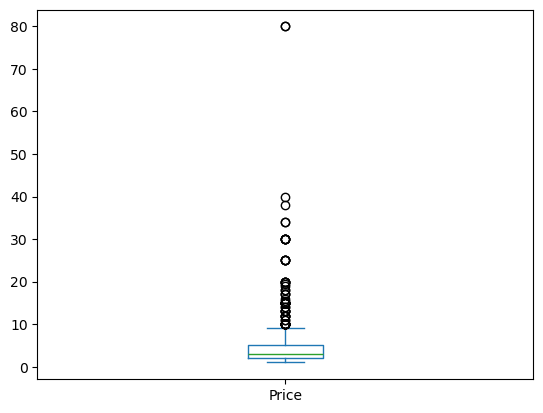

In [106]:
#Create a box plot for paid apps
inp1[inp1.Price>0].Price.plot.box()

In [108]:
#Check the apps with price more than 30
inp1[inp1.Price>30]

App   Category  Rating  Reviews     Size  \
2253  Vargo Anesthesia Mega App    MEDICAL     4.6       92  32000.0   
2301    A Manual of Acupuncture    MEDICAL     3.5      214  68000.0   
2365  Vargo Anesthesia Mega App    MEDICAL     4.6       92  32000.0   
2402    A Manual of Acupuncture    MEDICAL     3.5      214  68000.0   
2414               LTC AS Legal    MEDICAL     4.0        6   1300.0   
5360           I am Rich Person  LIFESTYLE     4.2      134   1800.0   

      Installs  Type  Price Content Rating     Genres     Last Updated  \
2253      1000  Paid  79.99       Everyone    Medical    June 18, 2018   
2301      1000  Paid  33.99       Everyone    Medical  October 2, 2017   
2365      1000  Paid  79.99       Everyone    Medical    June 18, 2018   
2402      1000  Paid  33.99       Everyone    Medical  October 2, 2017   
2414       100  Paid  39.99       Everyone    Medical    April 4, 2018   
5360      1000  Paid  37.99       Everyone  Lifestyle    July 18, 2017   

     Current Ver   Android Ver  
2253        19.0  4.0.3 and up  
2301      2.1.35    4.0 and up  
2365        19.0  4.0.3 and up  
2402      2.1.35    4.0 and up  
2414       3.0.1    4.1 and up  
5360         1.0  4.0.3 and up

In [110]:
#Clean the Price column again
inp1 = inp1[inp1.Price <= 30]
inp1.shape

(9338, 13)

Histograms 

Histograms can also be used in conjunction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific bins. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its frequency.

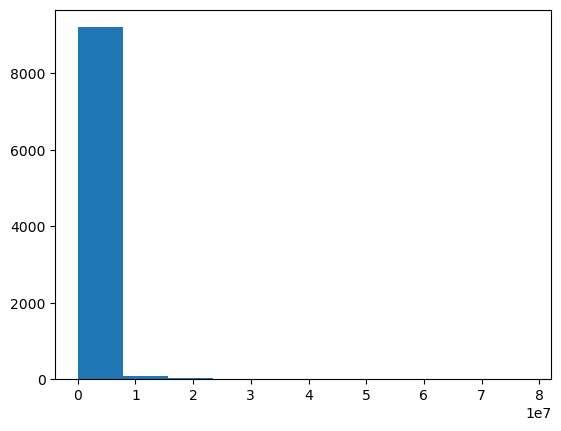

Signature:
plt.hist(
    x: 'ArrayLike | Sequence[ArrayLike]',
    bins: 'int | Sequence[float] | str | None' = None,
    range: 'tuple[float, float] | None' = None,
    density: 'bool' = False,
    weights: 'ArrayLike | None' = None,
    cumulative: 'bool | float' = False,
    bottom: 'ArrayLike | float | None' = None,
    histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar',
    align: "Literal['left', 'mid', 'right']" = 'mid',
    orientation: "Literal['vertical', 'horizontal']" = 'vertical',
    rwidth: 'float | None' = None,
    log: 'bool' = False,
    color: 'ColorType | Sequence[ColorType] | None' = None,
    label: 'str | Sequence[str] | None' = None,
    stacked: 'bool' = False,
    *,
    data=None,
    **kwargs,
) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
Docstring:
Compute and plot a histogram.

This method uses `numpy.histogram` to bin the data in *x* and count the
number of values in eac

In [116]:
#Create a histogram of the reviews
?plt.hist
plt.hist(inp1.Reviews)
plt.show()

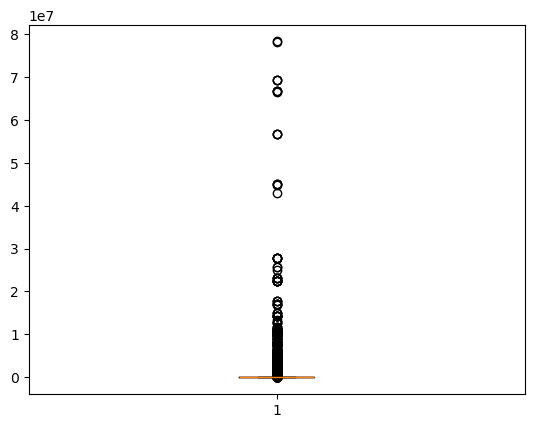

In [118]:
#Create a boxplot of the Reviews column
plt.boxplot(inp1.Reviews)
plt.show()

In [120]:
#Check records with 1 million reviews
inp1[inp1.Reviews >= 1000000]

App             Category  Rating  \
139                      Wattpad 📖 Free Books  BOOKS_AND_REFERENCE     4.6   
152                         Google Play Books  BOOKS_AND_REFERENCE     3.9   
189                               Uber Driver             BUSINESS     4.4   
194    OfficeSuite : Free Office + PDF Editor             BUSINESS     4.3   
201                    Facebook Pages Manager             BUSINESS     4.0   
...                                       ...                  ...     ...   
10190                         Fallout Shelter               FAMILY     4.6   
10200                  Facebook Pages Manager             BUSINESS     4.0   
10327                        Garena Free Fire                 GAME     4.5   
10636                      FRONTLINE COMMANDO                 GAME     4.4   
10707          Photo Editor Collage Maker Pro          PHOTOGRAPHY     4.5   

       Reviews          Size    Installs  Type  Price Content Rating  \
139    2914724  21516.529524   100000000  Free    0.0           Teen   
152    1433233  21516.529524  1000000000  Free    0.0           Teen   
189    1254730  21516.529524    10000000  Free    0.0       Everyone   
194    1002861  35000.000000   100000000  Free    0.0       Everyone   
201    1279184  21516.529524    50000000  Free    0.0       Everyone   
...        ...           ...         ...   ...    ...            ...   
10190  2721923  25000.000000    10000000  Free    0.0           Teen   
10200  1279800  21516.529524    50000000  Free    0.0       Everyone   
10327  5534114  53000.000000   100000000  Free    0.0           Teen   
10636  1351833  12000.000000    10000000  Free    0.0           Teen   
10707  1519671  21516.529524   100000000  Free    0.0       Everyone   

                  Genres      Last Updated         Current Ver  \
139    Books & Reference    August 1, 2018  Varies with device   
152    Books & Reference    August 3, 2018  Varies with device   
189             Business    August 3, 2018  Varies with device   
194             Business    August 2, 2018           9.7.14188   
201             Business    August 2, 2018  Varies with device   
...                  ...               ...                 ...   
10190         Simulation     June 11, 2018             1.13.12   
10200           Business    August 6, 2018  Varies with device   
10327             Action    August 3, 2018              1.21.0   
10636             Action  October 28, 2013               3.0.3   
10707        Photography  February 1, 2018  Varies with device   

              Android Ver  
139    Varies with device  
152    Varies with device  
189    Varies with device  
194            4.1 and up  
201    Varies with device  
...                   ...  
10190          4.1 and up  
10200  Varies with device  
10327        4.0.3 and up  
10636          2.1 and up  
10707  Varies with device  

[704 rows x 13 columns]

In [122]:
#Drop the above records
inp1 = inp1[inp1.Reviews <= 1000000]
inp1.shape

(8634, 13)

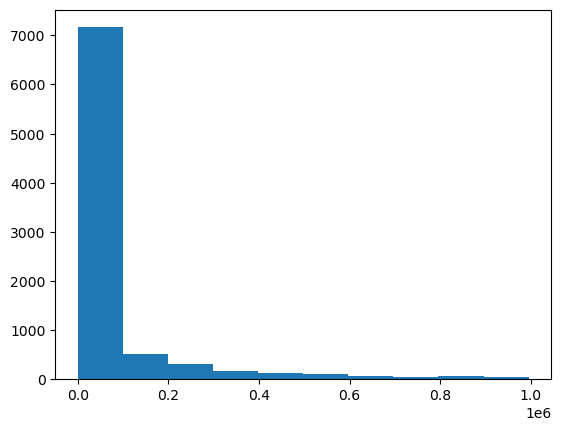

In [124]:
#Question - Create a histogram again and check the peaks
plt.hist(inp1.Reviews)
plt.show()

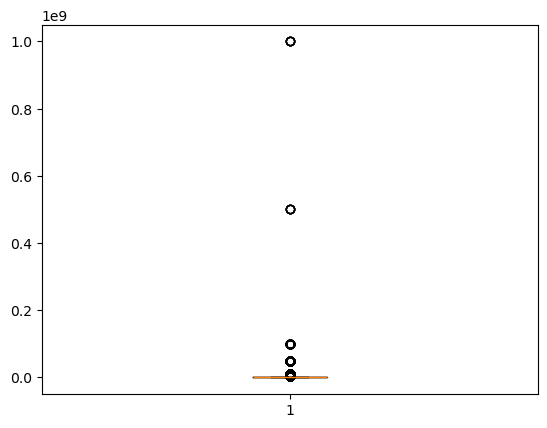

In [126]:
#Question - Create a box plot for the Installs column and report back the IQR
plt.boxplot(inp1.Installs)
plt.show()

In [128]:
inp1.Installs.describe()

count    8.634000e+03
mean     4.288536e+06
std      2.864650e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [130]:
#Question - Clean the Installs by removing all the apps having more than or equal 100 million installs
inp1 = inp1[inp1.Installs <= 100000000]
inp1.shape

(8624, 13)

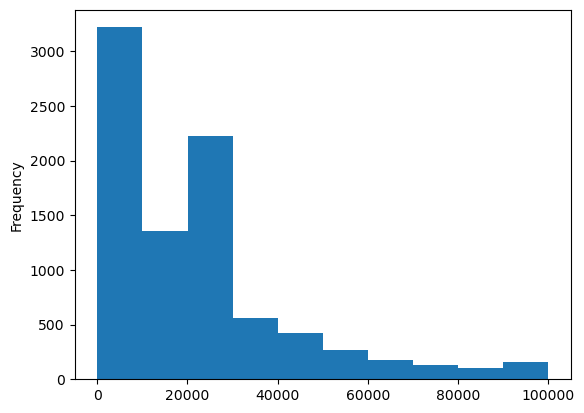

In [132]:
#Plot a histogram for size as well
inp1.Size.plot.hist()
plt.show()

In [134]:
inp1.Size.describe()

count      8624.000000
mean      21634.926354
std       20668.248638
min           8.500000
25%        6000.000000
50%       18000.000000
75%       26000.000000
max      100000.000000
Name: Size, dtype: float64

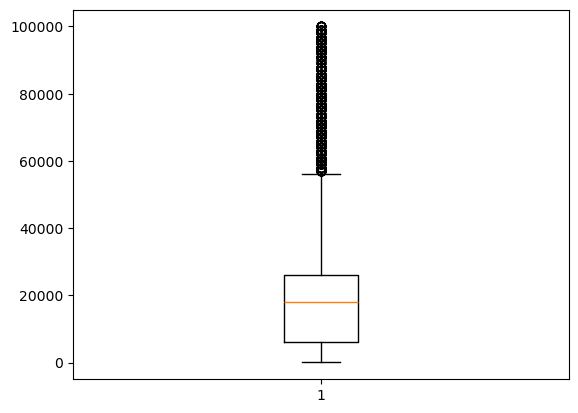

In [136]:
#Question - Create a boxplot for the size column and report back the median value
plt.boxplot(inp1.Size)
plt.show()

Data Visualization with Seaborn 

Seaborn is a Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.
Functionalities of Seaborn:
- Dataset oriented API
- Analyzing univariate and bivariate distributions
- Automatic estimation and plotting of linear regression models
- Convenient views for complex datasets
- Concise control over style
- Color palettes

In [146]:
#import the necessary libraries
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the KDE) that gets drawn over the distribution is the approximate probabilty density curve.
The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket. 

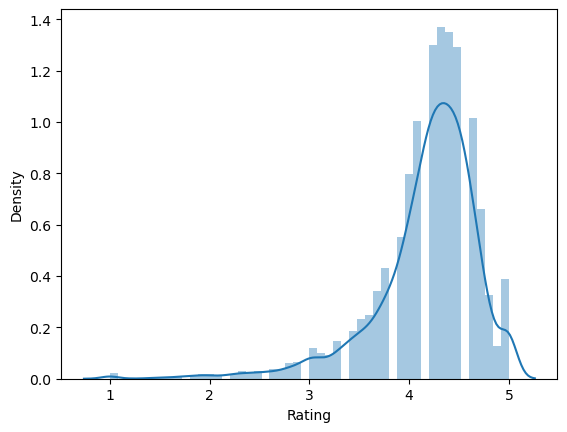

In [152]:
#Create a distribution plot for rating
sns.distplot(inp1.Rating)
plt.show()

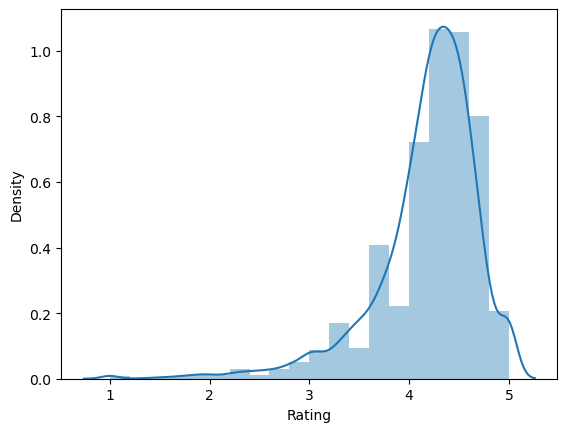

In [154]:
#Change the number of bins
sns.distplot(inp1.Rating,bins=20)
plt.show()

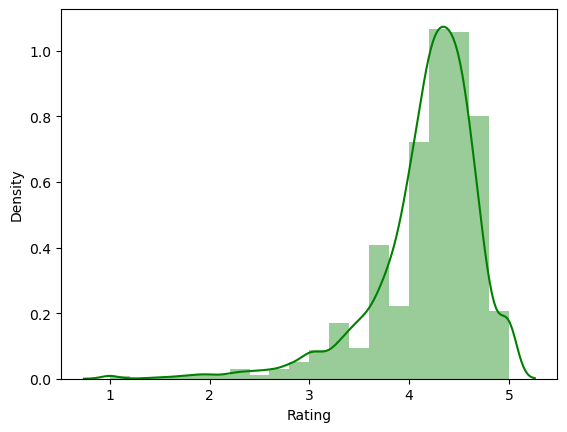

In [156]:
#Change the color of the bins to green
sns.distplot(inp1.Rating, bins=20, color="g")
plt.show()

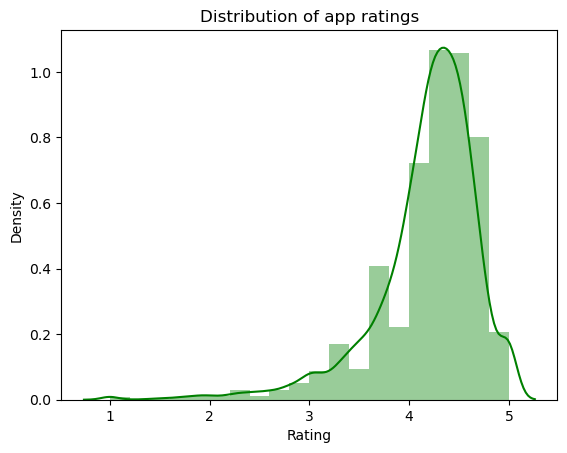

In [158]:
#Apply matplotlib functionalities
sns.distplot(inp1.Rating, bins=20, color="g")
plt.title("Distribution of app ratings", fontsize=12)
plt.show()

Styling Options 

One of the biggest advantages of using Seaborn is that you can retain its aesthetic properties and also the Matplotlib functionalities to perform additional customizations. Before we continue with our case study analysis, let's study some styling options that are available in Seaborn.

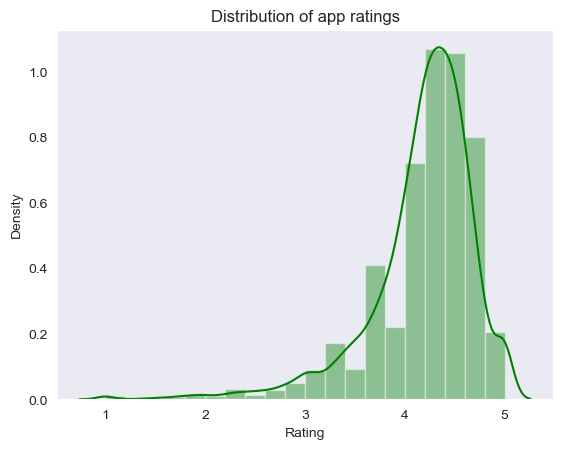

Signature: sns.set_style(style=None, rc=None)
Docstring:
Set the parameters that control the general style of the plots.

The style parameters control properties like the color of the background and
whether a grid is enabled by default. This is accomplished using the
matplotlib rcParams system.

The options are illustrated in the
:doc:`aesthetics tutorial <../tutorial/aesthetics>`.

See :func:`axes_style` to get the parameter values.

Parameters
----------
style : dict, or one of {darkgrid, whitegrid, dark, white, ticks}
    A dictionary of parameters or the name of a preconfigured style.
rc : dict, optional
    Parameter mappings to override the values in the preset seaborn
    style dictionaries. This only updates parameters that are
    considered part of the style definition.

Examples
--------

.. include:: ../docstrings/set_style.rst
File:      /opt/anaconda3/lib/python3.12/site-packages/seaborn/rcmod.py
Type:      function

In [164]:
#Check all the styling options
?sns.set_style
sns.set_style("dark")
sns.distplot(inp1.Rating, bins=20, color="g")
plt.title("Distribution of app ratings", fontsize=12)
plt.show()

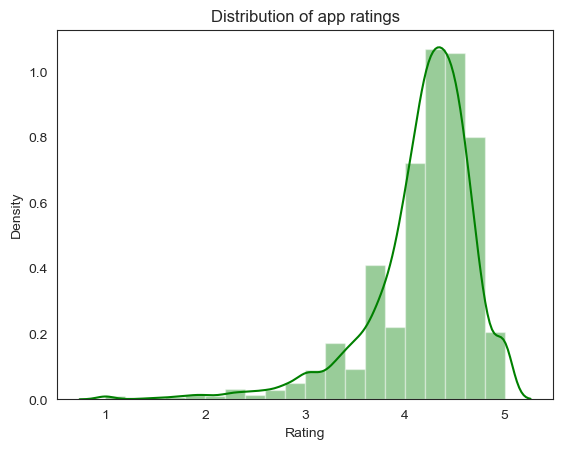

In [166]:
sns.set_style("white")
sns.distplot(inp1.Rating, bins=20, color="g")
plt.title("Distribution of app ratings", fontsize=12)
plt.show()

In [168]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [170]:
plt.style.use("tableau-colorblind10")

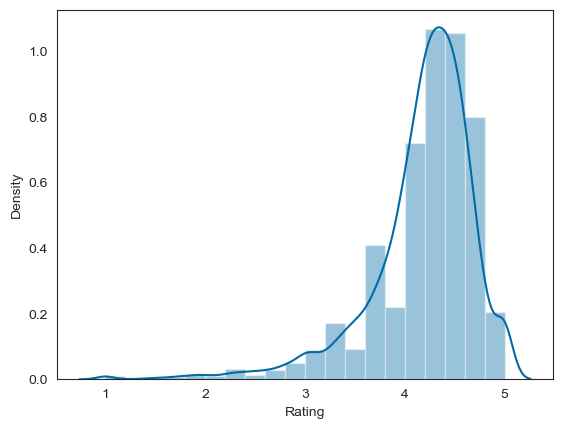

In [172]:
#Change the number of bins to 20
sns.distplot(inp1.Rating, bins=20)
plt.show()

In [174]:
plt.style.use("ggplot")

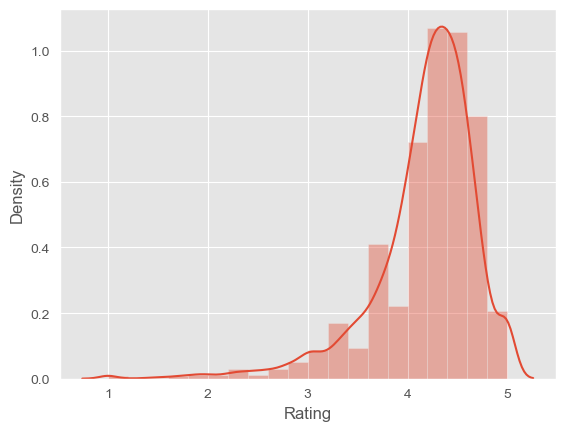

In [176]:
sns.distplot(inp1.Rating, bins=20)
plt.show()

In [178]:
plt.style.use("dark_background")

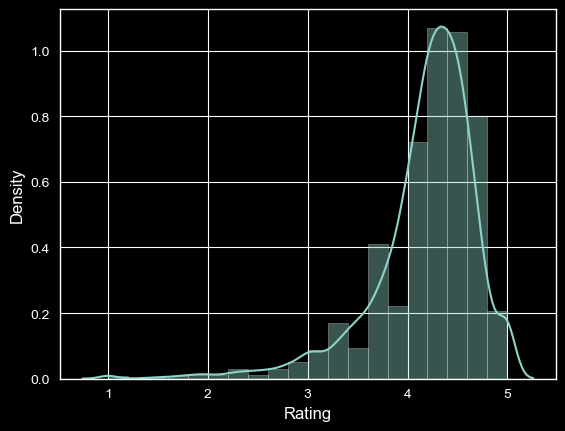

In [180]:
sns.distplot(inp1.Rating, bins=20)
plt.show()

In [182]:
plt.style.use("default")
%matplotlib inline

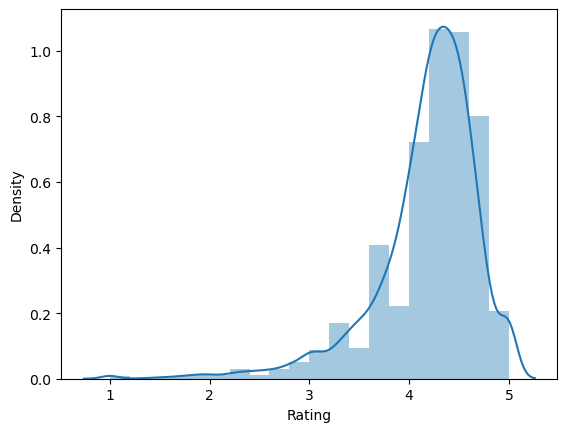

In [186]:
sns.distplot(inp1.Rating, bins=20)
plt.show()

Pie Chart and Bar Chart (header)

For analyzing how a numeric variable changes across several categories of a categorical variable you utilize either a pie chart or a boz plot. For example, if you want to visualize the responses of a marketing campaign, you can use the either charts. 

In [192]:
#Analyze the Content Rating column 
inp1["Content Rating"].value_counts()

Content Rating
Everyone           6938
Teen                928
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [194]:
#Remove the rows with values which are less represented
inp1=inp1[~inp1["Content Rating"].isin(["Adults only 18+","Unrated"])]

In [196]:
inp1.shape

(8620, 13)

In [202]:
#Reset the index
inp1.reset_index(inplace=True, drop=True)

In [204]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8620 entries, 0 to 8619
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8620 non-null   object 
 1   Category        8620 non-null   object 
 2   Rating          8620 non-null   float64
 3   Reviews         8620 non-null   int32  
 4   Size            8620 non-null   float64
 5   Installs        8620 non-null   int64  
 6   Type            8620 non-null   object 
 7   Price           8620 non-null   float64
 8   Content Rating  8620 non-null   object 
 9   Genres          8620 non-null   object 
 10  Last Updated    8620 non-null   object 
 11  Current Ver     8616 non-null   object 
 12  Android Ver     8618 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 841.9+ KB


In [206]:
#Check the apps belonging to different categories of Content Rating
inp1["Content Rating"].value_counts()

Content Rating
Everyone        6938
Teen             928
Mature 17+       417
Everyone 10+     337
Name: count, dtype: int64

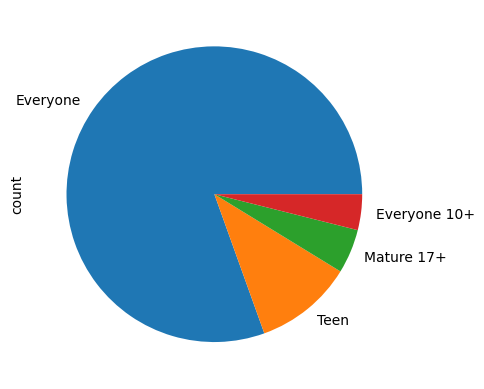

In [208]:
#Plot a pie chart
inp1["Content Rating"].value_counts().plot.pie()
plt.show()

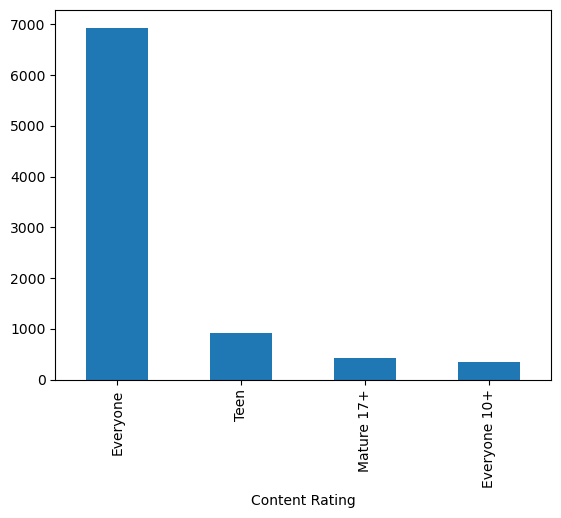

In [210]:
#Plot a bar chart
inp1["Content Rating"].value_counts().plot.bar()
plt.show()

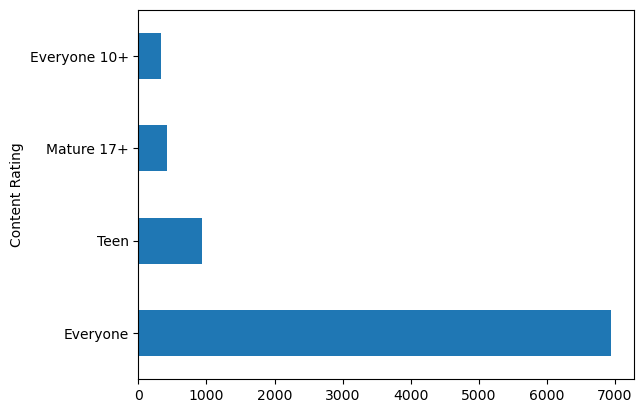

In [212]:
#Question - Plot a bar plot for checking the 4th highest Android verson type
inp1["Content Rating"].value_counts().plot.barh()
plt.show()

Scatter Plots 

Scatterplots are perhaps one of the most commonly used as well as one of the most powerful visualizations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot. 

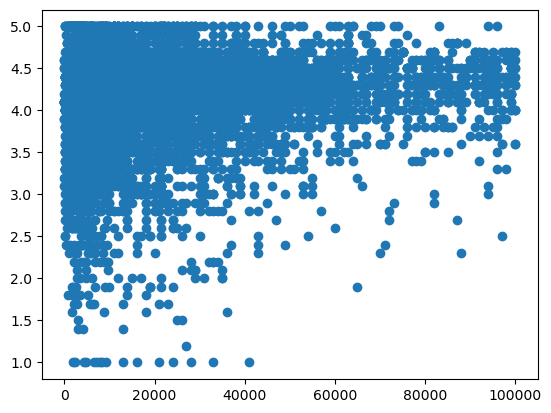

In [218]:
#Size vs Rating
#Plot a scatter-plot in the matplotlib way between Size and Rating
plt.scatter(inp1.Size, inp1.Rating)
plt.show()

In [220]:
#Plot the same thing now using a jointplot
sns.set_style("white")

In [222]:
?sns.jointplot

Signature:
sns.jointplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    kind='scatter',
    height=6,
    ratio=5,
    space=0.2,
    dropna=False,
    xlim=None,
    ylim=None,
    color=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    marginal_ticks=False,
    joint_kws=None,
    marginal_kws=None,
    **kwargs,
)
Docstring:
Draw a plot of two variables with bivariate and univariate graphs.

This function provides a convenient interface to the :class:`JointGrid`
class, with several canned plot kinds. This is intended to be a fairly
lightweight wrapper; if you need more flexibility, you should use
:class:`JointGrid` directly.

Parameters
----------
data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
    Input data structure. Either a long-form collection of vectors that can be
    assigned to named variables or a wide-form dataset that will be internally
    reshaped.
x, y : vectors or keys in ``data``
    Variables that s

Reg Plots

These are an extension to the jointplots, where a regression line is added to the view

In [240]:
#Plot a reg plot for Price and Rating and observe the trend
sns.jointplot(inp1.Price, inp1.Rating, kind="reg")
plt.show()

AttributeError: module 'seaborn' has no attribute 'jointplots'

In [242]:
#Question - Plot a reg plot for Price and Rating again for only the paid apps.
sns.jointplot("Price", "Rating", data=inp1[inp1.Price>0], kind="reg")
plt.show()

TypeError: jointplot() got multiple values for argument 'data'

Pair Plots (header)

When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualization is preferred where all the scatter plots are in a single view in the form of a matrix.
For the non-diagonal views, it plots a scatter plot between 2 numeric values.
For the diagonal views, it plots a histogram.

In [248]:
#Create a pair plot for Reviews, Size, Pricing, and Rating
?sns.pairplot

Signature:
sns.pairplot(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared across the y-axes across a single row and
the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal
distribution of the data in each column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you

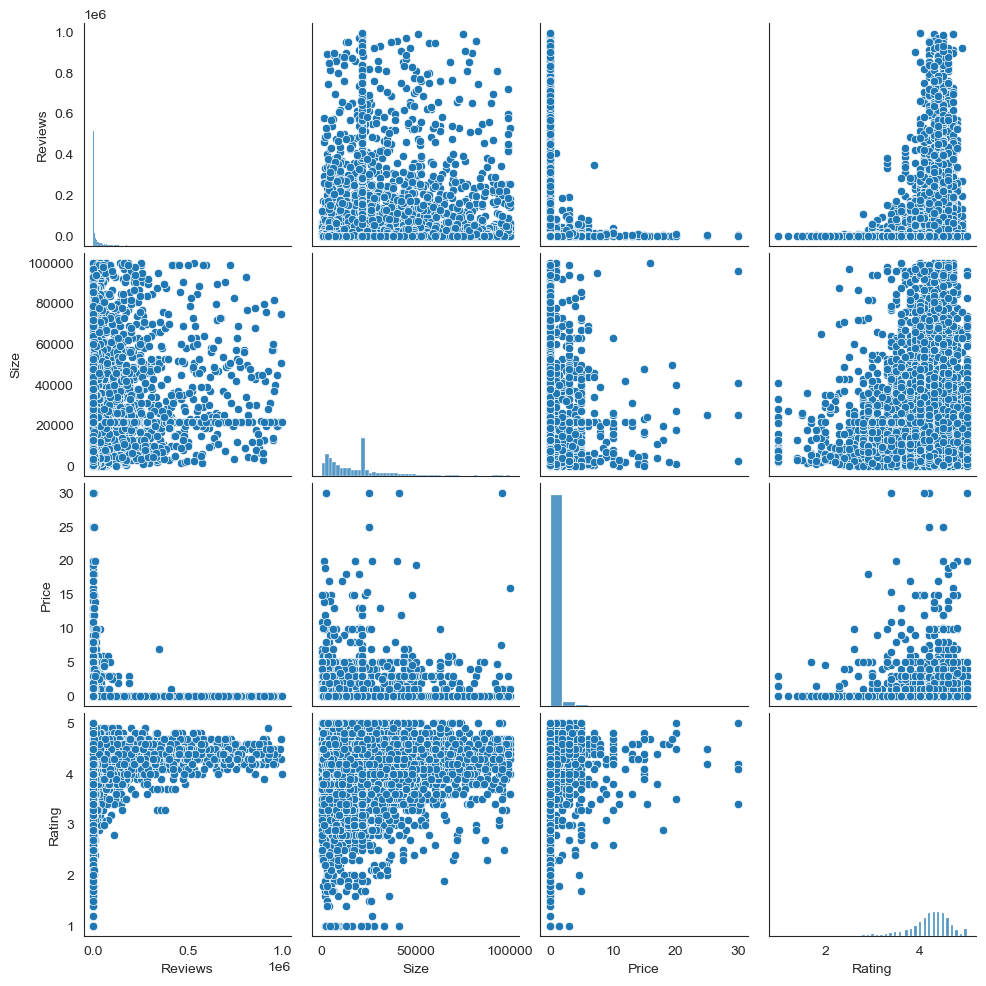

In [250]:
sns.pairplot(inp1[["Reviews","Size","Price","Rating"]])
plt.show()

Bar Charts Revisited 

<Axes: xlabel='Content Rating'>

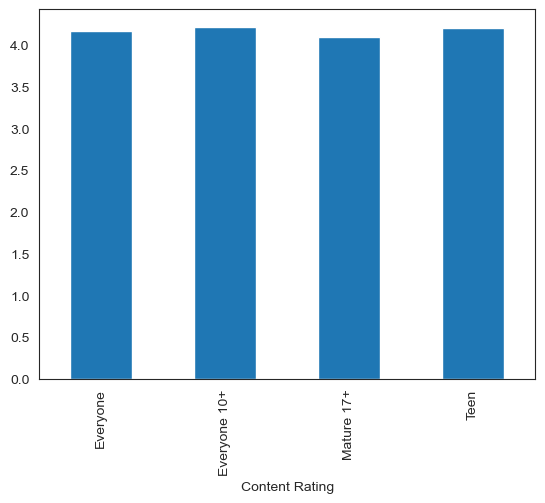

In [254]:
#Plot a bar plot of Content Rating vs Average Rating
inp1.groupby(["Content Rating"])["Rating"].mean().plot.bar()

<Axes: xlabel='Content Rating'>

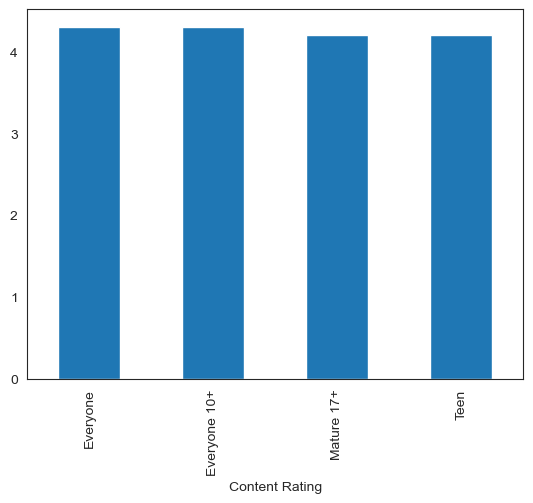

In [256]:
#Plot the bar plot again with Medium Rating
inp1.groupby(["Content Rating"])["Rating"].median().plot.bar()

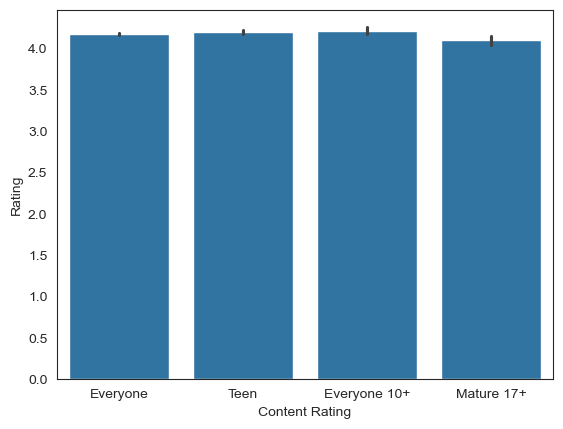

In [258]:
sns.barplot(data=inp1, x="Content Rating",y="Rating")
plt.show()

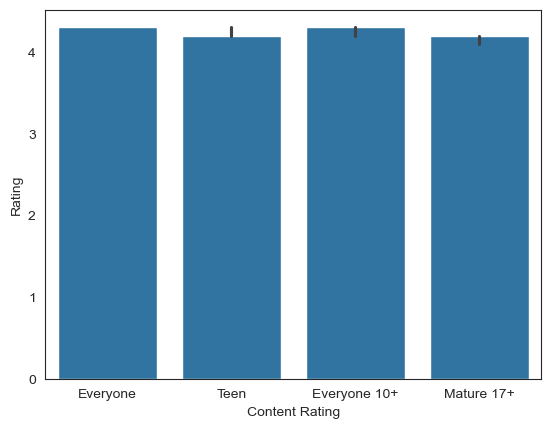

In [260]:
#Plot the above bar plot using the estimator parameter
sns.barplot(data=inp1, x="Content Rating", y="Rating", estimator=np.median)
plt.show()

<Axes: xlabel='Content Rating', ylabel='Rating'>

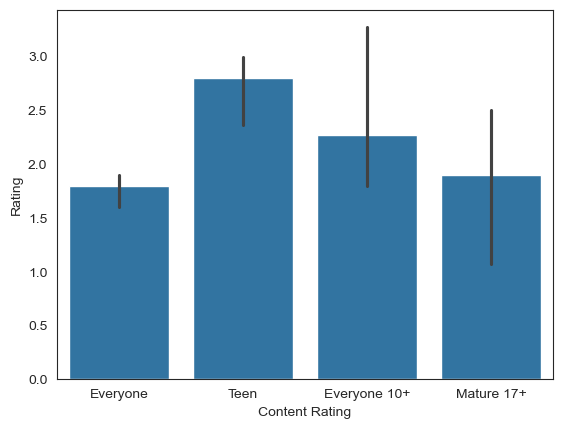

In [262]:
#Plot the bar plot with only the 5th percentile of Ratings
sns.barplot(data=inp1, x="Content Rating", y="Rating", estimator = lambda x:np.quantile(x,0.005))

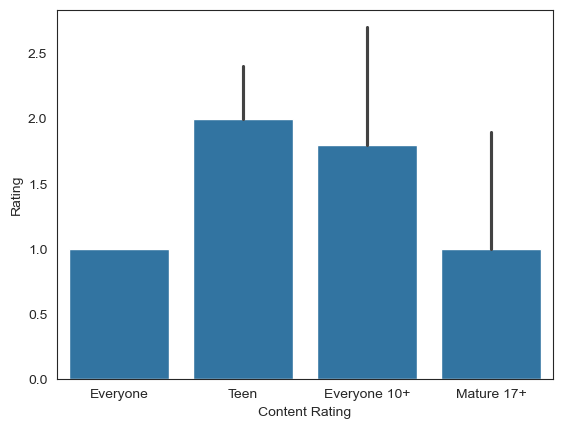

In [264]:
#Question - Plot the bar plot with minimum Rating
sns.barplot(data=inp1, x="Content Rating", y="Rating", estimator=np.min)
plt.show()

Box Plots Revisited 

Apart from outliter analysis, box plots are great at comparing the spread and analyzing a numerical variable across several categories

In [270]:
#Plot a box plot of Rating vs Content Rating
plt.figure(figsize=[9,7])
sns.boxplot(inp1["Content Rating"], inp1.Rating)
plt.show()

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 900x700 with 0 Axes>

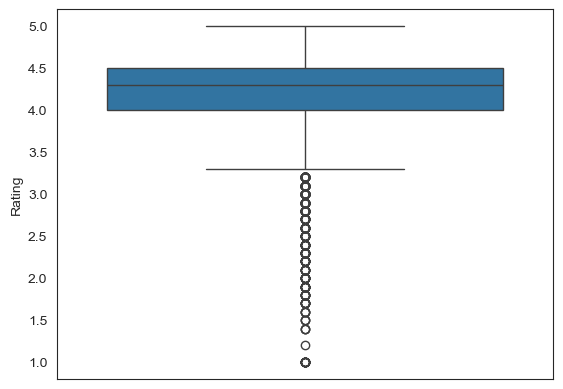

In [272]:
#Question - Plot a box plot for the Rating Column only
sns.boxplot(inp1.Rating)
plt.show()

In [274]:
#Question - Plot a box plot of Ratings across the 4 most popular genres
inp1["Genres"].value_counts()

Genres
Tools                     694
Entertainment             508
Education                 464
Medical                   344
Finance                   315
                         ... 
Arcade;Pretend Play         1
Card;Brain Games            1
Lifestyle;Pretend Play      1
Comics;Creativity           1
Strategy;Creativity         1
Name: count, Length: 115, dtype: int64

In [276]:
c=["Tools","Entertainment","Medical","Education"]
inp5 = inp1[inp1["Genres"].isin(c)]

Heat Maps 

Heat maps utlize the concept of using colors and color intensities to visualize a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the players' areas of strength and weakness. 

In [284]:
#Ratings vs Size vs Content rating
#Prepare buckets for the Size column using pd.qcut

inp1["Size_Bucket"] = pd.qcut(inp1.Size, [0,0.2,0.4,0.6,0.8,1],["VL","L","M","H","VH"])

In [286]:
#Create a pivot table for Size_Buckets and Content Rating with values set to Rating
inp1.head()
pd.pivot_table(data=inp1, index="Content Rating", columns="Size_Bucket", values="Rating")

Size_Bucket           VL         L         M         H        VH
Content Rating                                                  
Everyone        4.117536  4.158405  4.215784  4.170799  4.187302
Everyone 10+    4.189474  4.207407  4.238318  4.193443  4.217073
Mature 17+      3.978947  4.124211  4.021705  4.155172  4.193814
Teen            4.184848  4.233094  4.143310  4.198131  4.246154

In [288]:
#Change the aggrefation to median
pd.pivot_table(data=inp1, index="Content Rating", columns="Size_Bucket", values="Rating",aggfunc=np.median)

Size_Bucket       VL    L    M    H   VH
Content Rating                          
Everyone        4.20  4.3  4.3  4.3  4.3
Everyone 10+    4.10  4.3  4.3  4.3  4.3
Mature 17+      4.25  4.2  4.1  4.1  4.2
Teen            4.20  4.3  4.2  4.2  4.3

In [290]:
#Change the aggregation to 20th percentile
pd.pivot_table(data=inp1, index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=lambda x:np.quantile(x,0.2))

Size_Bucket       VL     L    M    H   VH
Content Rating                           
Everyone        3.80  3.80  4.0  3.8  3.9
Everyone 10+    3.86  3.92  4.1  4.0  4.0
Mature 17+      3.30  3.68  3.7  3.9  4.0
Teen            3.80  3.90  3.9  4.0  4.0

In [292]:
#Store the pivot table in a seperate variable
res = pd.pivot_table(data=inp1, index="Content Rating", columns="Size_Bucket",values="Rating", aggfunc=lambda x:np.quantile(x,0.2))

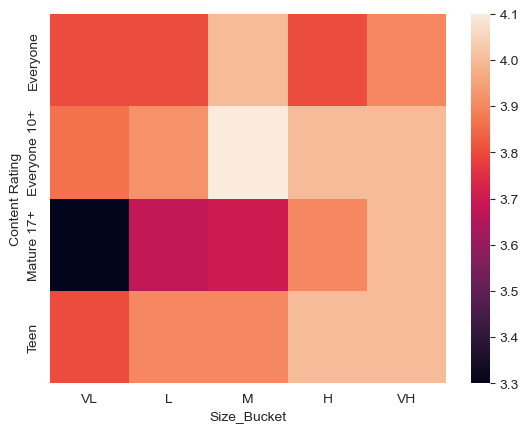

In [294]:
#Plot a heat map
sns.heatmap(res)
plt.show()

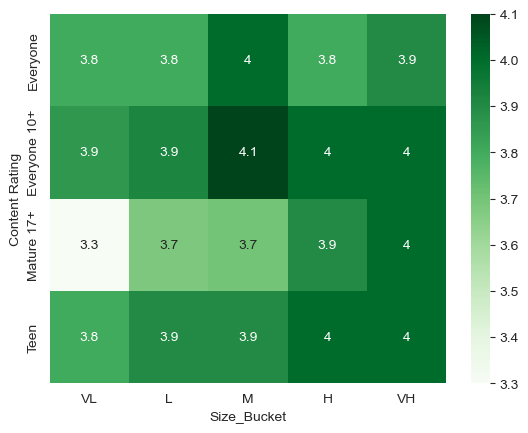

In [296]:
#Apply customizations
sns.heatmap(res, cmap = "Greens", annot=True)
plt.show()

In [298]:
#Question - Replace Content Rating with Review_buckets in the above heat map
#Keep the aggregation at minimum value for Rating
inp1.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs             int64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Size_Bucket       category
dtype: object

Line Plots 

A line plot trues to observe trends using time dependent data

In [304]:
#Extract the month from the last updated date
inp1["Last Updated"].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [306]:
inp1["updated_month"] = pd.to_datetime(inp1["Last Updated"]).dt.month

In [308]:
#Find the average rating across all the months
inp1.groupby(["updated_month"])["Rating"].mean()

updated_month
1     4.143842
2     4.090385
3     4.107963
4     4.148326
5     4.153375
6     4.172590
7     4.222968
8     4.271086
9     4.041406
10    4.012739
11    4.102685
12    4.065350
Name: Rating, dtype: float64

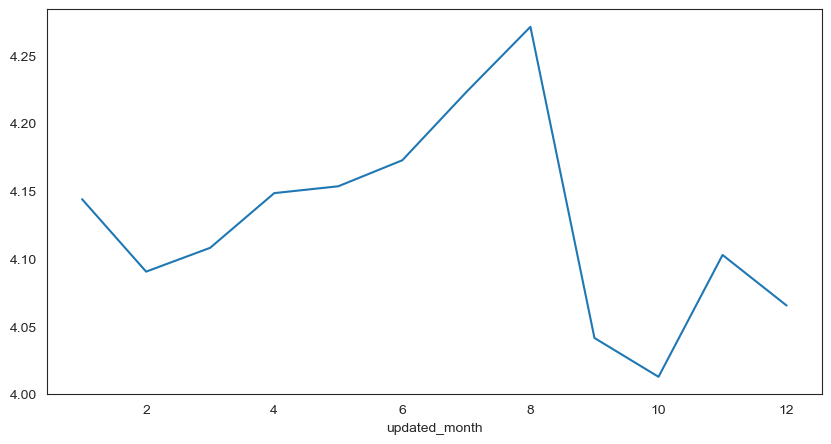

In [310]:
#Plot a line graph
plt.figure(figsize=[10,5])
inp1.groupby(["updated_month"])["Rating"].mean().plot()
plt.show()

Stacked Bar Charts (header)

A stacked bar chart breaks down each bar of the bar chart on the basis of a different category

In [318]:
#Create a pivot table for Content Rating and updated month with the values set to Installs
pd.pivot_table(data=inp1, values="Installs",index="updated_month",columns="Content Rating",aggfunc=sum)

Content Rating    Everyone  Everyone 10+  Mature 17+        Teen
updated_month                                                   
1                925387390     105282000     9701210    44159010
2                545372005      19821000    13021500    39597710
3                695365520      30322510     9111100    79850310
4                973371180      23300000     5259000   161619410
5               1861067800     118173500    50140100   202689600
6               2427170505     317727100   145257200   415716600
7               7771109680     456556000   419491910  1943556800
8               5930943320     215821000   312981700  1257855650
9                260340410      24931100     2201010    22483100
10               258279680      23101000     3160000    45629210
11               625424710      60310000     1070100    31261100
12               567105770       8410000    12960100    51707100

In [320]:
#Store the table in a seperate variable
monthly = pd.pivot_table(data=inp1, values="Installs", index="updated_month",columns="Content Rating",aggfunc=sum)

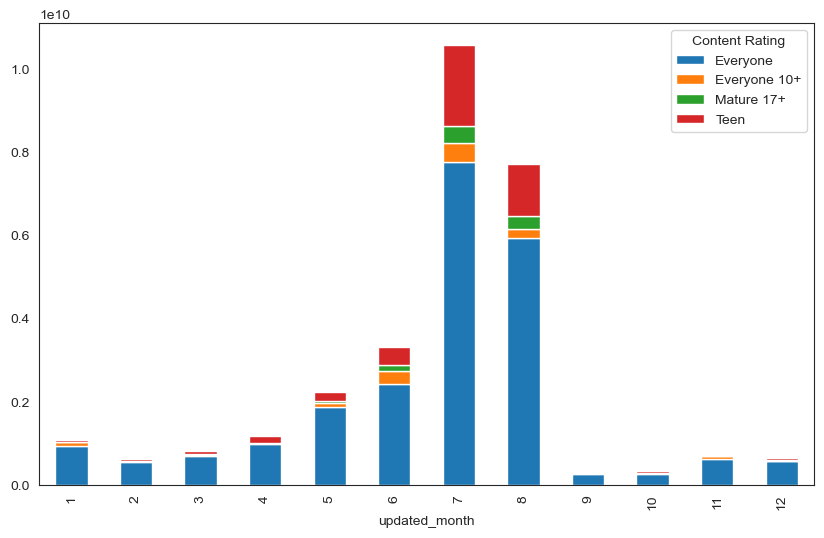

In [322]:
#Plot the stacked bar chart
monthly.plot(kind="bar",stacked="True",figsize=[10,6])
plt.show()

In [324]:
#Plot the stacked bar chart again wrt to the proportions
monthly_perc=monthly[["Everyone","Everyone 10+","Mature 17+","Teen"]].apply(lambda x:x/x.sum(), axis=1)

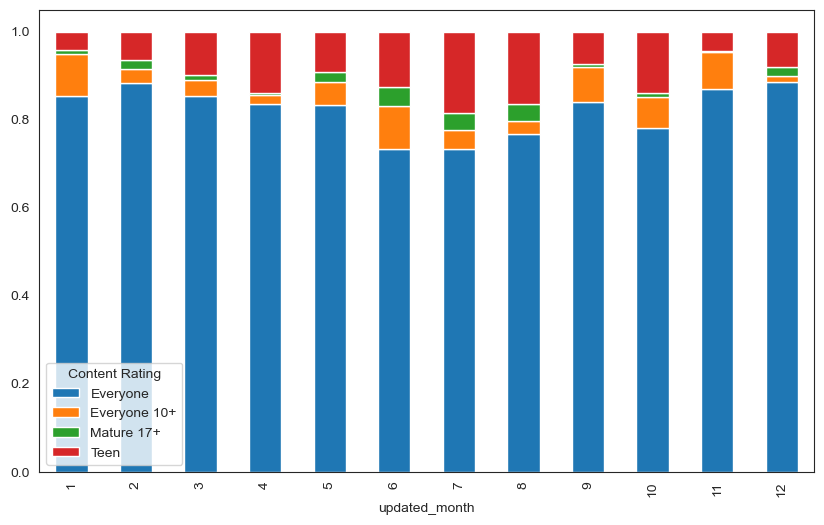

In [326]:
monthly_perc.plot(kind="bar",stacked="True",figsize=[10,6])
plt.show()

Plotly (header)

Plotly is a Python library used for creating interactive visual charts. You can take a look at how it is used to create an aesthetic looking plots with a lot of user-friendly functionalities like hover,zoom,etc.

In [332]:
#Install plotly
!pip install plotly

In [334]:
#Take the table you want to plot in a seperate variable
res = inp1.groupby(["updated_month"])[["Rating"]].mean()
res.reset_index(inplace=True)

In [336]:
res

updated_month    Rating
0               1  4.143842
1               2  4.090385
2               3  4.107963
3               4  4.148326
4               5  4.153375
5               6  4.172590
6               7  4.222968
7               8  4.271086
8               9  4.041406
9              10  4.012739
10             11  4.102685
11             12  4.065350

In [338]:
#Import the plotly libraries
import plotly.express as px

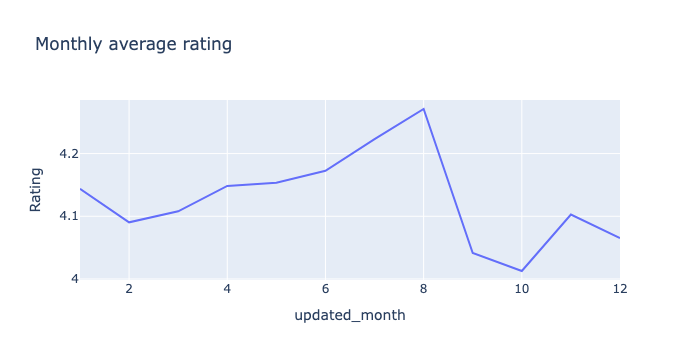

In [340]:
#Prepare the plot
fig=px.line(res, x="updated_month",y="Rating",title="Monthly average rating")
fig.show()